In [1]:
.libPaths('/root/miniconda3/envs/Rdoc/lib/R/library')

In [4]:
library(scran)

In [5]:
library(Rphenograph)
library(igraph)
library(dittoSeq)

In [5]:
library(SpatialExperiment)

In [6]:
T = readRDS('./b.anno.rds')

In [7]:
spe = T

In [8]:
options(repr.plot.width = 6,repr.plot.height = 6)

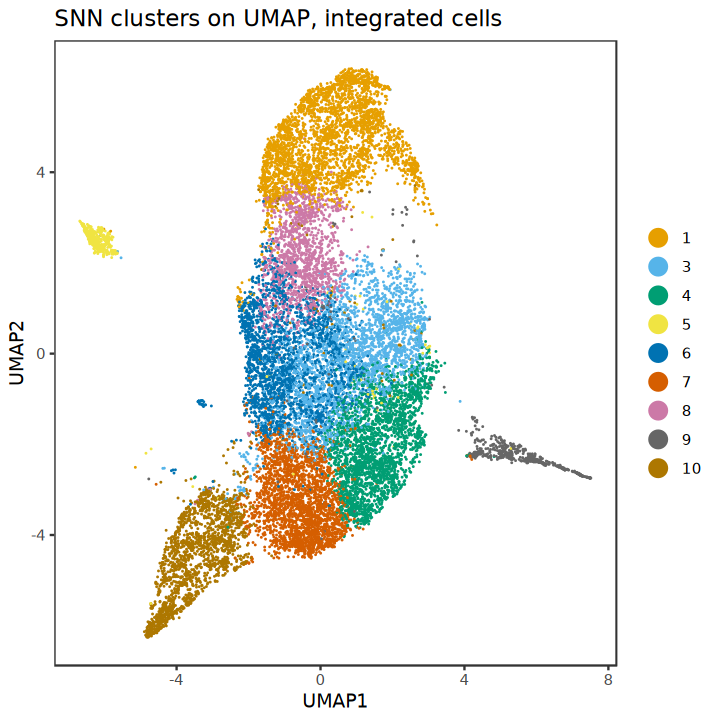

In [13]:
dittoDimPlot(spe, var = "nn_clusters_corrected", 
             reduction.use = "UMAP_mnnCorrected", size = 0.2,
             do.label = FALSE) +
    ggtitle("SNN clusters on UMAP, integrated cells")

In [14]:
ggsave('B.figure1.umap.pdf',height = 6,width = 6)

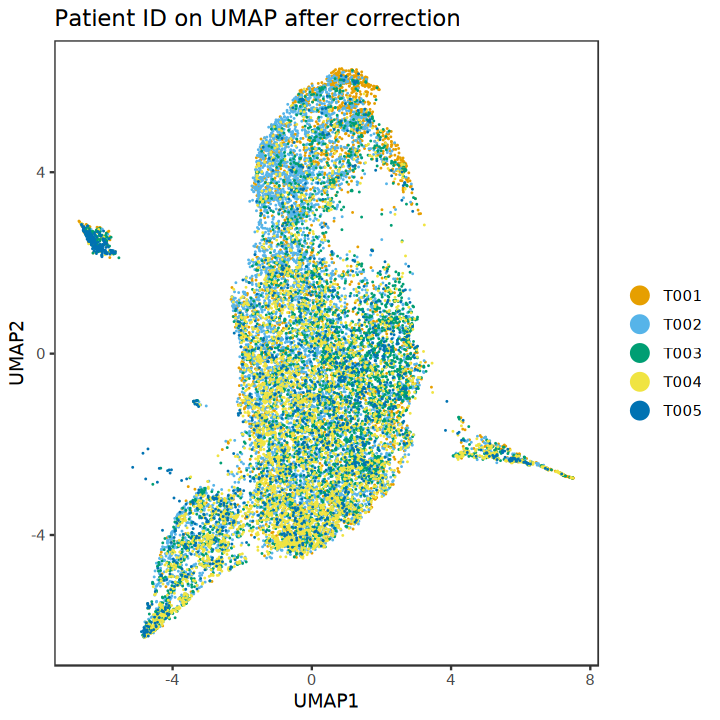

In [15]:
library(cowplot)
library(dittoSeq)
library(viridis)
dittoDimPlot(spe, var = "patient_id", 
                   reduction.use = "UMAP_mnnCorrected", size = 0.2) + 
   #scale_color_manual(values = metadata(spe)$color_vectors$patient_id) +
    ggtitle("Patient ID on UMAP after correction")

In [16]:
ggsave('B.figure1.umap2.pdf',height = 6,width = 6)

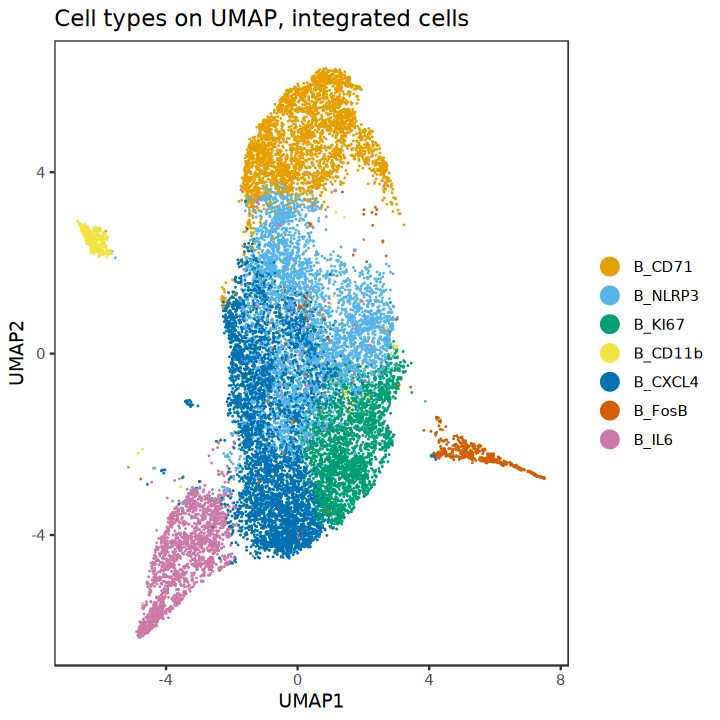

In [17]:
dittoDimPlot(spe, 
                   var = "celltype", 
                   reduction.use = "UMAP_mnnCorrected", 
                   size = 0.2,
                   do.label = FALSE) +
 # scale_color_manual(values = metadata(spe)$color_vectors$celltype) +
  theme(legend.title = element_blank()) +
  ggtitle("Cell types on UMAP, integrated cells")

In [19]:
ggsave('B.figure1.umap3.pdf',height = 6,width = 6)

In [20]:
funcge = c('IL-6','FoxP3','CD69','BCA1','TIM3','CD71','CXCR4','PD-L1',
           'CCR7','CD11b','CD20','FosB','GranzymeB','PD-1','Ki-67','TNFa',
           'm6A','KLF2','NLRP3','HIF1a')

In [21]:
library(ggsci)

In [25]:
library(dplyr)
cluster_celltype <- recode(spe$nn_clusters_corrected,
                           #'11' = 'unlabel',
                           '9' = 'B_FosB',
                           '1' = 'B_CD71',
                           #'2' = 'unlabel',
                           '5' = 'B_TIM3',
                           '10' = 'B_IL6',
                           '3' = 'B_NLRP3',
                           '8' = 'B_NLRP3',
                           '6' = 'B_CXCL4',
                           '7' = 'B_CXCL4',
                           '4' = 'B_KI67'
                                    
)

In [26]:
spe$celltype <- cluster_celltype

In [29]:
unique(spe$celltype)

[1] B_CD71  B_NLRP3 B_KI67  B_TIM3  B_CXCL4 B_FosB  B_IL6  
Levels: B_CD71 2 B_NLRP3 B_KI67 B_TIM3 B_CXCL4 B_FosB B_IL6 11

In [30]:
spe$celltype = factor(spe$celltype,levels = c('B_CD71','B_NLRP3',
                                              'B_KI67','B_TIM3',
                                              'B_CXCL4','B_FosB',
                                              'B_IL6'))

In [31]:
T = spe

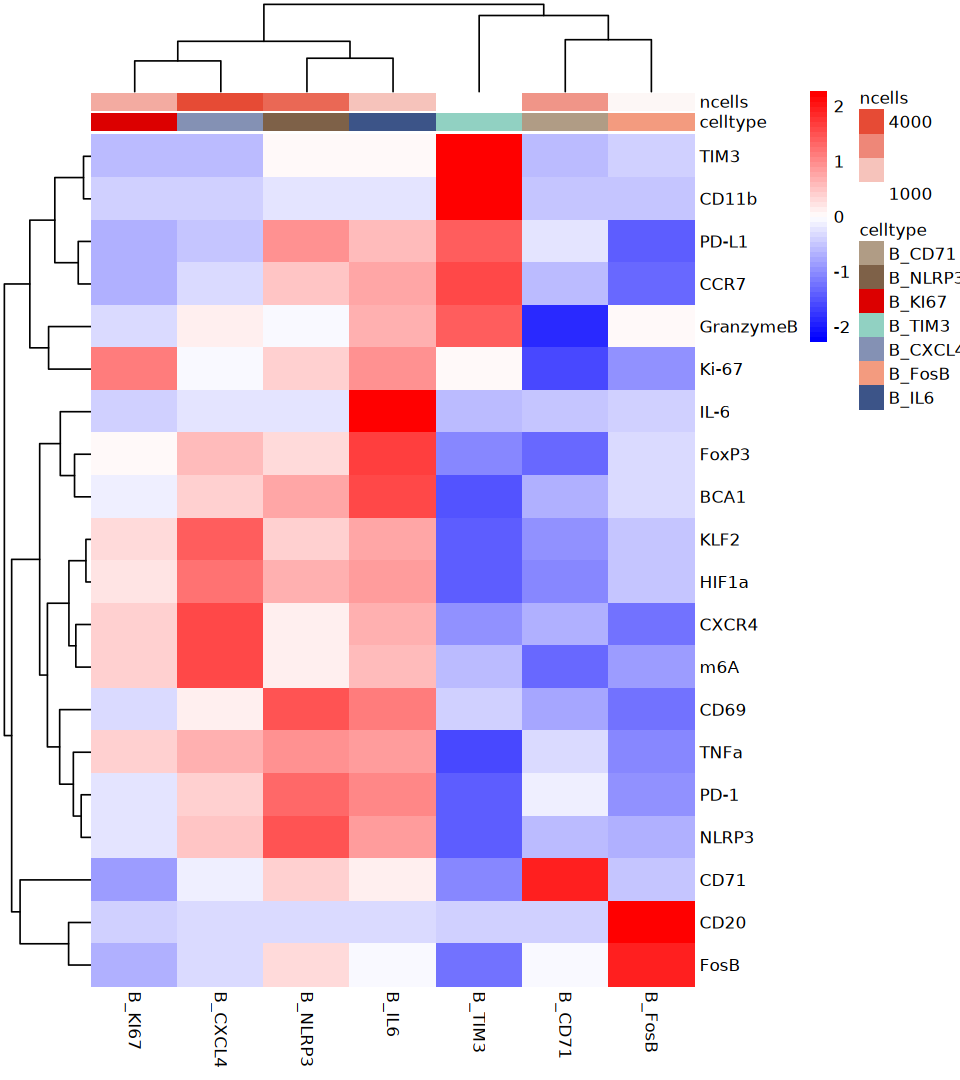

In [32]:
library(scuttle)
## aggregate by cell type
celltype_mean <- aggregateAcrossCells(as(T, "SingleCellExperiment"),  
                     ids = T$celltype, 
                     statistics = "mean",
                     use.assay.type = "exprs", 
                     subset.row = funcge)

library(dittoSeq)
library(colorspace)
library(viridis)

options(repr.plot.width = 8,repr.plot.height = 9)

p = dittoHeatmap(celltype_mean,
             assay = "exprs", 
             cluster_cols = TRUE, show_rownames = TRUE,show_colnames =TRUE,
             annot.colors = rev(pal_npg("nrc")(10)),
             annot.by = c("celltype", "ncells"))

In [33]:
pdf('B.figure2.heat.pdf',width = 6,height = 6)
p
dev.off()

png 
  2

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is

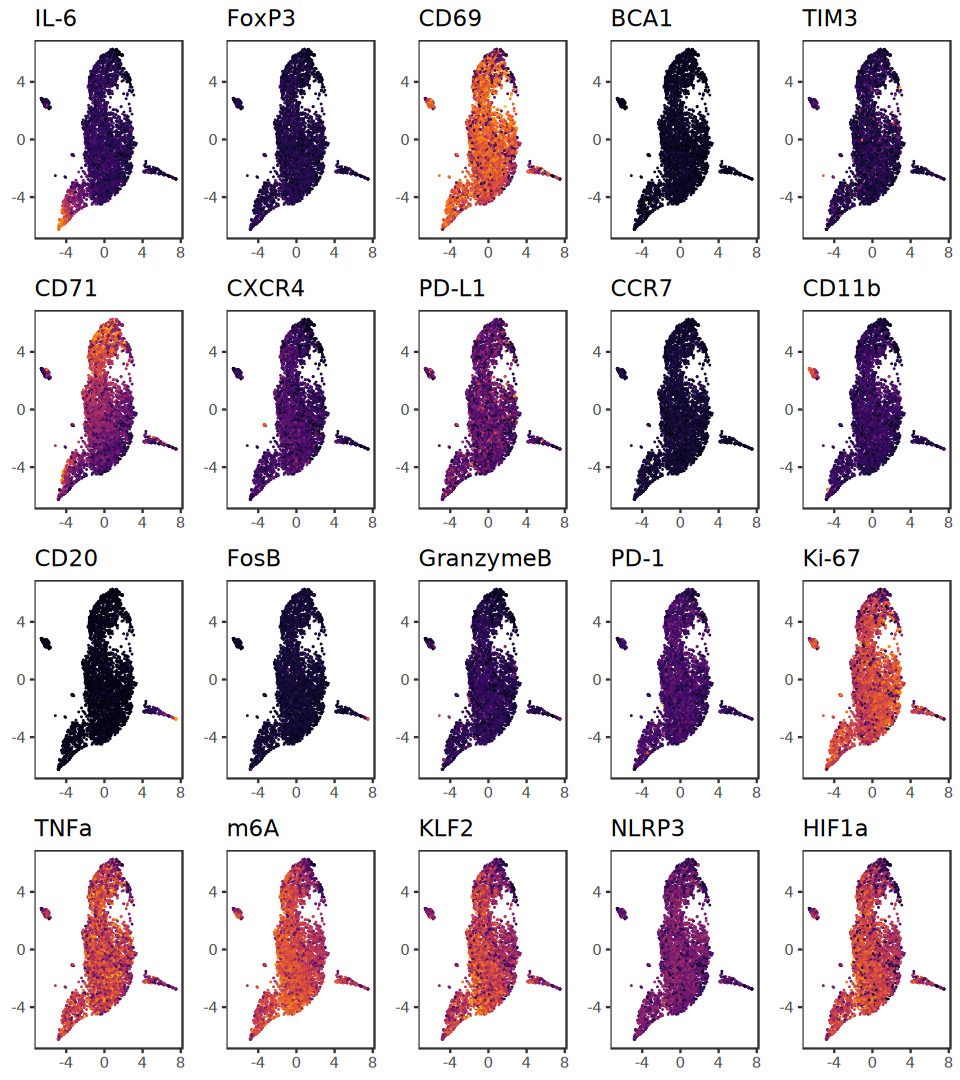

In [34]:
set.seed(220818)
cur_cells <- sample(seq_len(ncol(spe)), 4000)
plot_list <- multi_dittoDimPlot(spe[,cur_cells], var = funcge, reduction.use = "UMAP_mnnCorrected", 
                   assay = "exprs", size = 0.2, list.out = TRUE) 
plot_list <- lapply(plot_list, function(x) x + scale_color_viridis(option = "B")  )
plot_grid(plotlist = plot_list) 

In [35]:
ggsave('B.figure1.marker.pdf',height = 12,width = 12)

In [36]:
options(repr.plot.height = 6,repr.plot.width = 6)

In [37]:
p = dittoBarPlot(spe, 
             var = "celltype", 
             group.by = "patient_id") +
    scale_fill_manual(values = pal_npg("nrc")(10))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


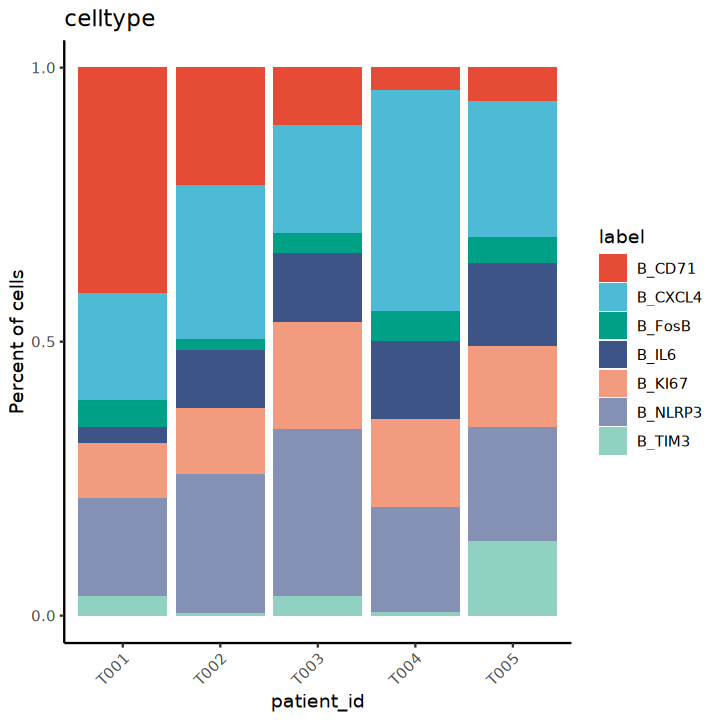

In [39]:
p

In [40]:
pdf('B.figure2.barplot.pdf',width = 5,height = 5)
p
dev.off()

png 
  2

In [41]:
p = dittoBarPlot(spe, 
             scale = "count",
             var = "celltype", 
             group.by = "patient_id") +
    scale_fill_manual(values = pal_npg("nrc")(10))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


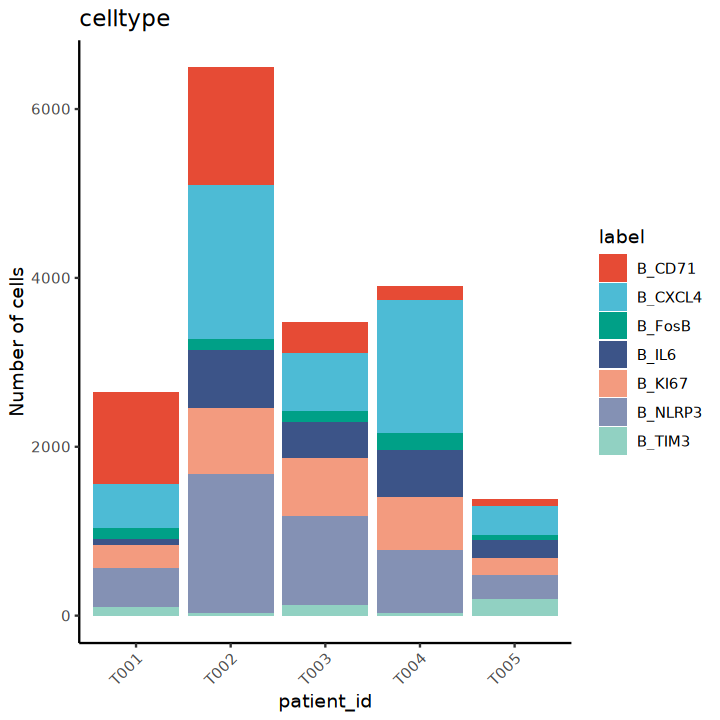

In [42]:
p

In [43]:
pdf('B.figure2.barplot2.pdf',width = 5,height = 5)
p
dev.off()

png 
  2

In [45]:
saveRDS(spe,file = './data2/B.anno.rds')